# For testing and plotting purposes

## generate patient and organ data

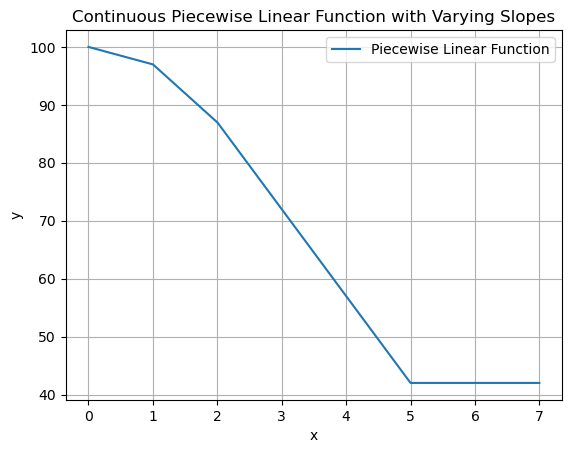

In [2]:
import numpy as np
import random
import pandas as pd
from synthetic_data import *
import matplotlib.pyplot as plt
import numpy as np

def piecewise_linear_continuous(x, slopes, breakpoints):
    # Check if the number of slopes and breakpoints match
    if len(slopes) != len(breakpoints) - 1:
        raise ValueError("Number of slopes should be one less than the number of breakpoints.")
    
    # Initialize y  ---> Make it another parameter
    y = 100

    # Find the interval in which x lies
    for i in range(len(breakpoints) - 1):
        if breakpoints[i] <= x < breakpoints[i + 1]:
            # Add the contribution of this interval to y
            y += slopes[i] * (x - breakpoints[i])
        elif x >= breakpoints[i + 1]:
            # If x is greater than the right breakpoint, add the full contribution of this interval to y
            y += slopes[i] * (breakpoints[i + 1] - breakpoints[i])
    
    return y

# Example usage:
slopes = [-3, -10, -15]  # Slopes for each interval
breakpoints = [0, 1, 2, 5]  # Breakpoints defining the intervals

# Generate x values
x_values = np.linspace(0, 7, 1000)

# Calculate y values using the piecewise_linear_continuous function
y_values = [piecewise_linear_continuous(x, slopes, breakpoints) for x in x_values]

# Plot the function
plt.plot(x_values, y_values, label='Piecewise Linear Function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Continuous Piecewise Linear Function with Varying Slopes')
plt.legend()
plt.grid(True)
plt.show()





slopes_case1 = [0.2, -0.2, -0.3]
slopes_case2 = [0.2, -3, -5]
slopes_case3 = [-2, -2, -2]


In [3]:
import numpy as np
import random
import pandas as pd
from synthetic_data import *
import matplotlib.pyplot as plt


def generate_patient(pat_id: int) -> dict:

    """
    Generate synthetic data for a transplant patient and donor. See comments for details on the data generation process. !!!!! Every feature is generated independently !!!!!!!!
    """
    age = random.randint(20, 80)  # Age between 20 and 80
    sex = random.choice(["male", "female"])  # Sex, 0 for Male and 1 for Female
    blood_type = random.choice(["A", "B", "AB", "0"])  # Blood Type, 1 for 'A', 2 for 'B', 3 for 'AB', 4 for 'O'
    rh = random.choice(["+", "-"])  # Rh, 0 for Negative and 1 for Positive
    weight  =  max(40, min(120, round(random.gauss(75,10),2))) # Weight normally distributed with a mean on 75 between 50 and 100 kg with 2 decimal places
    hla_a = random.choice(range(1, 5))  # HLA, 1 for 'A', 2 for 'B', 3 for 'C', 4 for 'D'
    hla_b = random.choice(range(1, 5))  # HLA, 1 for 'A', 2 for 'B', 3 for 'C', 4 for 'D'
    hla_c = random.choice(range(1, 5))  # HLA, 1 for 'A', 2 for 'B', 3 for 'C', 4 for 'D'
    

    return {'pat_id': pat_id, 'age': age, 'sex': sex, 'blood_type': blood_type, 'rh': rh, 'weight': weight, 'hla_a': hla_a, 'hla_b': hla_b, 'hla_c': hla_c}




def generate_organ(org_id: int) -> dict:
    """
    Generate synthetic data for a transplant organ. See comments for details on the data generation process. 

    """
    cold_ischemia_time = max(0, min(round(random.gauss(7, 2),2),24))  # Cold Ischemia Time between 0 and 24 hours, gaussian distribution with a mean of 7 hours and a standard deviation of 2 hours
    dsa = random.choice([0, 1])  # DSA, 0 for Negative and 1 for Positive
    blood_type_don = random.choice(["A", "B", "AB", "0"])  # Blood Type, 1 for 'A', 2 for 'B', 3 for 'AB', 4 for 'O'
    rh_don = random.choice(["+", "-"])  # Rh, 0 for Negative and 1 for Positive
    age_don = random.randint(20, 80)  # Age between 20 and 80
    sex_don = random.choice(["male", "female"])
    weight_don = max(40, min(120, round(random.gauss(75,10),2))) # Weight normally distributed with a mean on 75 between 50 and 100 kg with 2 decimal places
    hla_a_don = random.choice(range(1, 5))  # HLA, 1 for 'A', 2 for 'B', 3 for 'C', 4 for 'D'
    hla_b_don = random.choice(range(1, 5))  # HLA, 1 for 'A', 2 for 'B', 3 for 'C', 4 for 'D'
    hla_c_don = random.choice(range(1, 5))  # HLA, 1 for 'A', 2 for 'B', 3 for 'C', 4 for 'D'
    ### How to generate DSAs? Ask Elias


    return {'org_id': org_id, 'cold_ischemia_time': cold_ischemia_time, 'dsa': dsa, 'blood_type_don': blood_type_don, 'rh_don': rh_don, 'age_don': age_don, 'sex_don': sex_don, 'weight_don': weight_don, 'hla_a_don': hla_a_don, 'hla_b_don': hla_b_don, 'hla_c_don': hla_c_don}


def piecewise_linear_continuous(x:float, slopes:list, breakpoints:list) -> float:

    """
    Evaluate a piecewise linear function at a given point x. The function is defined by a list of slopes and a list of breakpoints. The function is linear between each pair of breakpoints, with the corresponding slope. The function is constant outside the range defined by the breakpoints.
    """
    # Check if the number of slopes and breakpoints match
    if len(slopes) != len(breakpoints) - 1:
        raise ValueError("Number of slopes should be one less than the number of breakpoints.")
    
    # Initialize y  ---> Make it another parameter
    y = 100

    # Find the interval in which x lies
    for i in range(len(breakpoints) - 1):
        if breakpoints[i] <= x < breakpoints[i + 1]:
            # Add the contribution of this interval to y
            y += slopes[i] * (x - breakpoints[i])
        elif x >= breakpoints[i + 1]:
            # If x is greater than the right breakpoint, add the full contribution of this interval to y
            y += slopes[i] * (breakpoints[i + 1] - breakpoints[i])
    
    return y





def generate_outcomes(features_pat: dict, features_org: dict) -> dict:
    """
    Generate (factual and counterfactual) outcomes for a transplant patient. See comments for details on the data generation process. 
    """
    

    # TODO: implement logic to generate the outcomes ----> Elias

    # 1st approach: Generate eGFR and rejection outcomes for each patient-organ pair using the patient and organ feautes
    slopes_1 = [-3, -10, -15, -15]  # Slopes for each interval
    slopes_2 = [-10, -20, -20, -20]  # Slopes for each interval
    slopes_3 = [0, 0, 0, 0]
    slopes_4 = [0, 0, -20, -20]
    slopes_5 = [-2, -1, 0, 0]
    slopes_6 = [-3, -2, -1, 0]

    # if age, weight and blod group in features_pat and features_don are the same, then use slopes_1
    # Extract features from patient and organ
    age_pat, weight_pat, blood_group_pat = features_pat["age"], features_pat["weight"], features_pat["blood_type"]
    age_org, weight_org, blood_group_org = features_org["age_don"], features_org["weight_don"], features_org["blood_type_don"]

    hla_a_pat, hla_b_pat, hla_c_pat = features_pat["hla_a"], features_pat["hla_b"], features_pat["hla_c"]
    hla_a_don, hla_b_don, hla_c_don = features_org["hla_a_don"], features_org["hla_b_don"], features_org["hla_c_don"]

    # Compare features and assign slopes accordingly
    if abs(age_org - age_pat) <=5 and abs(weight_org - weight_pat) <=20 and blood_group_pat == blood_group_org and hla_a_pat == hla_a_don and hla_b_pat == hla_b_don and hla_c_pat == hla_c_don:
        slopes = slopes_3
    elif abs(age_org - age_pat) <=5 and abs(weight_org - weight_pat) <=20 and blood_group_pat == blood_group_org and hla_a_pat == hla_a_don and hla_b_pat == hla_b_don and hla_c_pat != hla_c_don:
        slopes = slopes_4
    elif abs(age_org - age_pat) <=5 and abs(weight_org - weight_pat) <=20 and blood_group_pat == blood_group_org and hla_a_pat == hla_a_don and hla_b_pat != hla_b_don and hla_c_pat != hla_c_don:
        slopes = slopes_5
    elif abs(age_org - age_pat) <=5 and abs(weight_org - weight_pat) <=20 and blood_group_pat == blood_group_org and hla_a_pat != hla_a_don and hla_b_pat != hla_b_don and hla_c_pat != hla_c_don:
        slopes = slopes_6
    elif abs(age_org - age_pat) >5 and abs(weight_org - weight_pat) <=20 and blood_group_pat == blood_group_org:
        slopes = slopes_1
    else: 
        slopes = slopes_2

    # Generate eGFR
    eGFR = [piecewise_linear_continuous(i, slopes, [0, 1, 2, 3, 4]) for i in range(1, 6)]

    # Generate rejection

    if blood_group_org != blood_group_pat:
        rejection = [1,1,1,1,1]
    elif abs(age_org - age_pat) <=5 and abs(weight_org - weight_pat) <=20 and blood_group_pat == blood_group_org and hla_a_pat == hla_a_don and hla_b_pat == hla_b_don and hla_c_pat == hla_c_don:
        rejection = [0,0,0,0,0]
    elif abs(age_org - age_pat) <=5 and abs(weight_org - weight_pat) <=20 and blood_group_pat == blood_group_org and hla_a_pat == hla_a_don and hla_b_pat == hla_b_don and hla_c_pat != hla_c_don:
        rejection = [0,0,0,0,0]
    elif abs(age_org - age_pat) <=5 and abs(weight_org - weight_pat) <=20 and blood_group_pat == blood_group_org and hla_a_pat == hla_a_don and hla_b_pat != hla_b_don and hla_c_pat != hla_c_don:
        rejection = [0,0,0,1,1]
    elif abs(age_org - age_pat) <=5 and abs(weight_org - weight_pat) <=20 and blood_group_pat == blood_group_org and hla_a_pat != hla_a_don and hla_b_pat != hla_b_don and hla_c_pat != hla_c_don:
        rejection = [0,0,1,1,1]
    else: 
        rejection = [0,0,1,1,1]

    
    return {'eGFR': eGFR, 'rejection': rejection}

        





   










def main():
    n = 100  # number of patients
    m = 100  # number of organs
    p = 10 #number of outcomes

    patients = [generate_patient(i) for i in range(n)]
    organs = [generate_organ(i) for i in range(m)]


    # Generate outcomes for each patient-organ pair 

    #format: 2-dimnesional list, where each element is a dictionary with the outcomes for a patient-organ pair
    outcomes = [[generate_outcomes(patients[i], organs[j]) for j in range(m)] for i in range(n)]

            #print(outcomes)
            #print(features_pat)
            #print(features_org)




    # Create a dataframe with the synthetic data
    df_patients = pd.DataFrame(patients)
    df_organs = pd.DataFrame(organs)
    df_outcomes = pd.DataFrame(outcomes)


    

    # Save the data as a csv file
    df_patients.to_csv('patients.csv', index=False)
    df_organs.to_csv('organs.csv', index=False)
    df_outcomes.to_csv('outcomes.csv', index=False)

    #print(df)



if __name__ == '__main__':
    main()

In [12]:
n = 100  # number of patients
m = 100  # number of organs
p = 10 #number of outcomes

patients = [generate_patient(i) for i in range(n)]
organs = [generate_organ(i) for i in range(m)]


# Generate outcomes for each patient-organ pair 

#format: 2-dimnesional list, where each element is a dictionary with the outcomes for a patient-organ pair
outcomes = [[generate_outcomes(patients[i], organs[j]) for j in range(m)] for i in range(n)]

        #print(outcomes)
        #print(features_pat)
        #print(features_org)




# Create a dataframe with the synthetic data
df_patients = pd.DataFrame(patients)
df_organs = pd.DataFrame(organs)
df_outcomes = pd.DataFrame(outcomes)


# only keep Egfr in outcomes
df_outcomes_2 = df_outcomes.applymap(lambda x: x['eGFR'][0] if x and 'eGFR' in x else None)
df_outcomes.head()


C:\Users\Ernesto\AppData\Local\Temp\ipykernel_7552\3766602553.py:28: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_outcomes_2 = df_outcomes.applymap(lambda x: x['eGFR'] if x and 'eGFR' in x else None)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,"{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [0...","{'eGFR': [97, 87, 72, 57, 57], 'rejection': [0...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...",...,"{'eGFR': [97, 87, 72, 57, 57], 'rejection': [0...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [0...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [0...","{'eGFR': [97, 87, 72, 57, 57], 'rejection': [0...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1..."
1,"{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [0...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [97, 87, 72, 57, 57], 'rejection': [0...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [97, 87, 72, 57, 57], 'rejection': [0...",...,"{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1..."
2,"{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [0...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [97, 87, 72, 57, 57], 'rejection': [0...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [97, 87, 72, 57, 57], 'rejection': [0...",...,"{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1..."
3,"{'eGFR': [97, 87, 72, 57, 57], 'rejection': [0...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...",...,"{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50, 30, 30], 'rejection': [1...","{'eGFR': [90, 70, 50